In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "piyush2798"
os.environ['KAGGLE_KEY'] = '9d2fadeec97b96b64f836c4e2a0ed507'

In [0]:
! kaggle datasets list -s dogs-vs-cats

ref                                                   title                                               size  lastUpdated          downloadCount  
----------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
biaiscience/dogs-vs-cats                              Dogs vs Cats                                       814MB  2017-12-05 14:03:33           2019  
nafisur/dogs-vs-cats                                  Dogs_vs_cats                                       217MB  2018-04-25 08:01:49           1633  
dhirensk/cats-vs-dogs-training8000test2000            Cats vs Dogs Training8000Test2000                  218MB  2018-11-21 09:38:07            135  
salader/dogs-vs-cats                                  dogs vs cats                                       545MB  2018-11-30 19:31:13            431  
tongpython/cat-and-dog                                Cat and Dog                                        2

In [0]:
!kaggle datasets download -d biaiscience/dogs-vs-cats 

 98% 794M/814M [00:12<00:00, 33.6MB/s]
100% 814M/814M [00:12<00:00, 65.7MB/s]


In [0]:
!unzip -q -n dogs-vs-cats.zip

In [0]:
! unzip -q -n test.zip
!unzip -q -n train.zip

In [0]:
###Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,Activation,MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [0]:
!mkdir final

In [0]:
import os
print(os.listdir())

['.config', 'test', 'kaggle (1).json', 'kaggle (3).json', 'kaggle(1).json', 'kaggle (2).json', 'kaggle.json', 'train.zip', 'test.zip', 'dogs-vs-cats.zip', 'train', 'sample_data']


FileNotFoundError: ignored

In [0]:
import os
print(os.listdir())

['.config', 'test', 'kaggle (1).json', 'kaggle (3).json', 'kaggle(1).json', 'kaggle (2).json', 'kaggle.json', 'train.zip', 'test.zip', 'dogs-vs-cats.zip', 'train', 'sample_data']


In [0]:

filenames = os.listdir("train")
c = []
for f in filenames:
  ca = f.split('.')[0]
  if ca == "dog":
    c.append(1)
  else:
    c.append(0)
    
    
df = pd.DataFrame({'filename':filenames,'category':c})

In [0]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()



# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128,128, 3)))
model.add(MaxPooling2D((2, 2)))

# block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# block 4
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))




model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
____________________________________

In [0]:

from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)




learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



callbacks = [earlystop, learning_rate_reduction]



In [0]:
df['category'] = df['category'].replace({0:'cat',1:'dog'})

In [0]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
train_df,validate_df = train_test_split(df,test_size=0.16,random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [0]:
train_df1,test_df = train_test_split(train_df,test_size=0.22,random_state=42)
train_df1 = train_df1.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
train_df1.shape,test_df.shape,validate_df.shape

((16380, 2), (4620, 2), (4000, 2))

In [0]:
test_df.head()

,filename
0,dog.1139.jpg
1,cat.8738.jpg
2,dog.10991.jpg
3,cat.7918.jpg
4,dog.1440.jpg


In [0]:
total_train = train_df1.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

In [0]:

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
)

Found 21000 validated image filenames belonging to 2 classes.


In [0]:

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
)




Found 4000 validated image filenames belonging to 2 classes.


In [0]:


example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical'
)




Found 1 validated image filenames belonging to 1 classes.


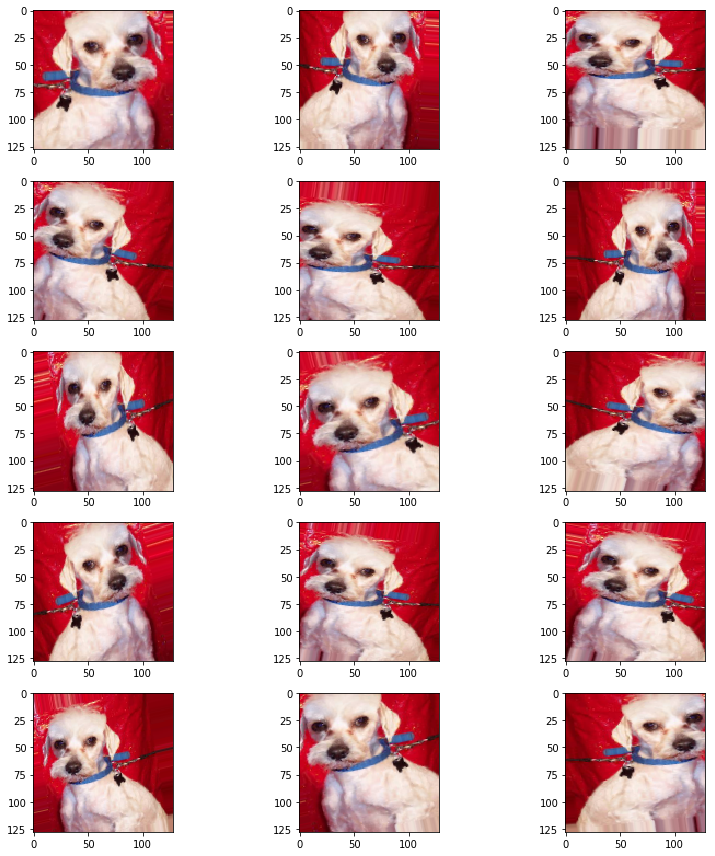

In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
epochs=50 
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)



Epoch 1/50
511/511 [==============================] - 140s 273ms/step - loss: 0.6738 - acc: 0.6340 - val_loss: 0.5309 - val_acc: 0.7322
Epoch 2/50
511/511 [==============================] - 132s 259ms/step - loss: 0.5222 - acc: 0.7421 - val_loss: 0.4235 - val_acc: 0.8024
Epoch 3/50
511/511 [==============================] - 132s 259ms/step - loss: 0.4603 - acc: 0.7874 - val_loss: 0.3863 - val_acc: 0.8330
Epoch 4/50
511/511 [==============================] - 132s 257ms/step - loss: 0.4131 - acc: 0.8106 - val_loss: 0.3524 - val_acc: 0.8424
Epoch 5/50
511/511 [==============================] - 130s 254ms/step - loss: 0.3727 - acc: 0.8347 - val_loss: 0.3533 - val_acc: 0.8431
Epoch 6/50
511/511 [==============================] - 133s 259ms/step - loss: 0.3321 - acc: 0.8543 - val_loss: 0.4204 - val_acc: 0.8304
Epoch 7/50
511/511 [==============================] - 133s 260ms/step - loss: 0.3008 - acc: 0.8690 - val_loss: 0.3137 - val_acc: 0.8755
Epoch 8/50
511/511 [============================

In [0]:
model.save_weights("model.h5")

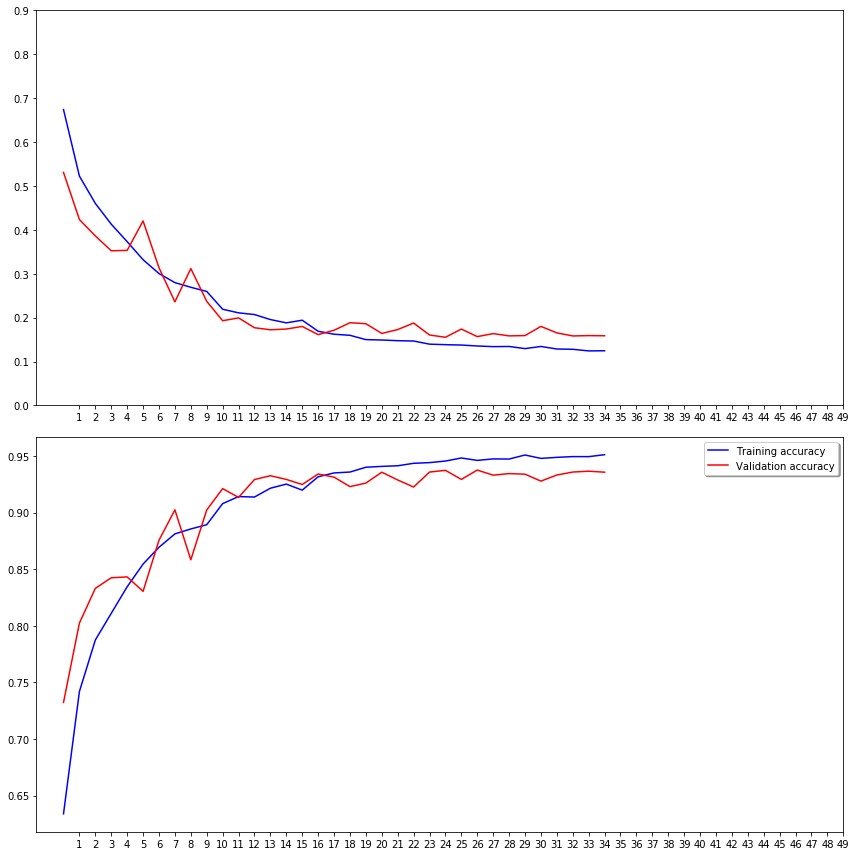

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))
ax1.plot(history.history['loss'],color='b',label='Training Loss')
ax1.plot(history.history['val_loss'],color='r',label='Validation Loss')
ax1.set_xticks(np.arange(1,epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))
ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
nb_samples = test_df.shape[0]
test_df.head()

,filename
0,dog.1139.jpg
1,cat.8738.jpg
2,dog.10991.jpg
3,cat.7918.jpg
4,dog.1440.jpg


In [0]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df,'train',x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=batch_size,
    shuffle=False
)

Found 4620 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator,steps = np.ceil(nb_samples/batch_size))

In [0]:
test_df['category'] = np.argmax(predict,axis=-1)


In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)



In [0]:
test_df.head()

,filename,category
0,dog.1139.jpg,dog
1,cat.8738.jpg,cat
2,dog.10991.jpg,dog
3,cat.7918.jpg,cat
4,dog.1440.jpg,dog


In [0]:
c,a = 0,0
for i,r in test_df.iterrows():
  a+=1
  if r['filename'].split('.')[0] == r['category']:
    c+=1
    
print(c,a)

4445 4620


In [0]:
c=[]
for i,r in test_df.iterrows():
  c.append(r['category'])
pred_cat = pd.DataFrame({'category':c})  

pred_cat.head()

,category
0,dog
1,cat
2,dog
3,cat
4,dog


In [0]:
c=[]
for i,r in test_df.iterrows():
  c.append(r['filename'].split('.')[0])
true_cat = pd.DataFrame({'category':c})  

true_cat.head()

,category
0,dog
1,cat
2,dog
3,cat
4,dog


In [0]:
true_c = true_cat.to_numpy()
pred_c = pred_cat.to_numpy()

In [0]:
from sklearn.metrics import classification_report
target_names = ['cat','dog']
print(classification_report(true_c, pred_c, target_names=target_names))

              precision    recall  f1-score   support

         cat       0.98      0.95      0.96      2371
         dog       0.95      0.98      0.96      2249

    accuracy                           0.96      4620
   macro avg       0.96      0.96      0.96      4620
weighted avg       0.96      0.96      0.96      4620



In [0]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(true_c,pred_c) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[2246  125]
 [  50 2199]]


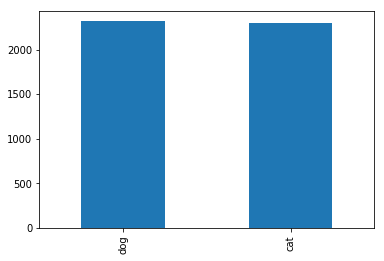

In [0]:
test_df['category'].value_counts().plot.bar()


In [0]:
test_df.head()

,filename,category
0,dog.1139.jpg,dog
1,cat.8738.jpg,cat
2,dog.10991.jpg,dog
3,cat.7918.jpg,cat
4,dog.1440.jpg,dog


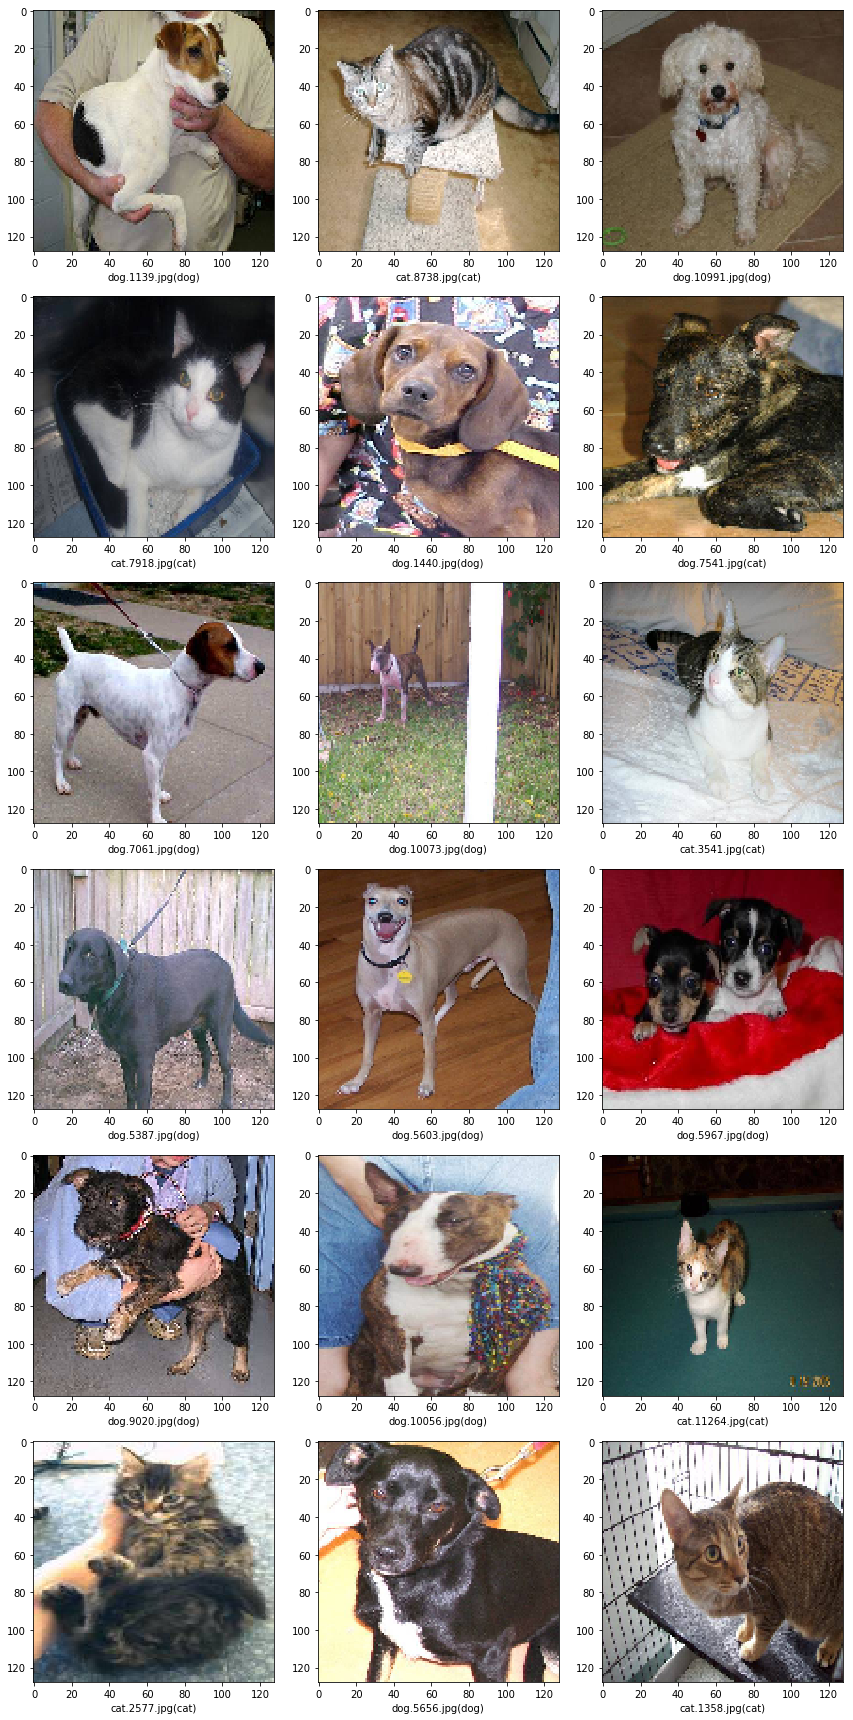

In [0]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("train/"+filename, target_size=(128,128))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()